Import dataset


In [35]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [36]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
!unzip imdb-dataset-of-50k-movie-reviews.zip


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  imdb-dataset-of-50k-movie-reviews.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Import necessary libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [38]:
df = pd.read_csv("/content/IMDB Dataset.csv")

In [39]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [40]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [41]:
df.isnull().sum()

,0
review,0
sentiment,0


In [42]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [43]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

Data Preprocessing

Remove special characters, URL and convert uppercase to lowercase

In [44]:
import re

def remove_string(string):
    takelist = ""  # Add specific characters to keep, if needed.

    # Remove HTML tags
    result = re.sub(r'<[^>]*>', " ", string)

    # Remove URLs
    result = re.sub(r'https?://\S+|www\.\S+', " ", result)

    # Remove non-alphanumeric characters (except those in takelist and spaces)
    result = re.sub(r"[^a-zA-Z0-9" + takelist + r"\s]", " ", result)

    # Convert to lowercase
    result = result.lower()

    return result


In [45]:
string = "<p>Hello! Visit https://example.com to check out my website!</p>"
print(remove_string(string))



 hello  visit   to check out my website  


In [46]:
#Apply the function to remove html tages, url, in our dataset

df['review'] = df['review'].apply(remove_string)

In [47]:
df['review'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right  as this is exactly what happened with me   the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word   it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away   i would say the main appeal of the show is due to the fact that it goes where other sh

Remove Stopwords

Stopwords are commonly used words in a language (e.g., "is", "the", "and") that often don't contribute much to the meaning of a sentence and are frequently removed during text preprocessing in natural language processing (NLP) tasks. Removing stopwords helps reduce noise and focus on more meaningful words.



In [48]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

WhitespaceTokenizer

The WhitespaceTokenizer is a tokenizer in the Natural Language Toolkit (NLTK) library that splits text into tokens (words) based on whitespace characters such as spaces, tabs, and newlines

In [57]:
from nltk.tokenize import WhitespaceTokenizer

w_tokenizer = WhitespaceTokenizer()

Lemmatization


Lemmatization is a process in natural language processing (NLP) where words are reduced to their base or root form.

In [50]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [51]:
#download nltk data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [52]:
#initialize the lemmatizer
lemmatizer = WordNetLemmatizer()


In [58]:
# Define a function to process and lemmatize the text
def lemmatize_text(text):

    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

    # Reconstruct the text from lemmatized tokens
    return ' '.join(lemmatized_tokens)



In [59]:
#Apply the funtion to the review column

df['review'] = df['review'].apply(lemmatize_text)

In [60]:
df['review']

,review
0,one reviewer mentioned watching 1 oz episode h...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically family little boy jake think zombie ...
4,petter mattei love time money visually stunnin...
...,...
49995,thought movie right good job creative original...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary school nu...
49998,going disagree previous comment side maltin on...


# Label Encoding

The sentiment column contains textual labels like "positive" and "negative".
convert these into numerical values for the model to process.


In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['sentiment'] = le.fit_transform(df['sentiment'])

df['sentiment'].head()

,sentiment
0,1
1,1
2,1
3,0
4,1


# Tokenize and Pad Sequences

Tokenization is the process of breaking text into smaller, manageable units called tokens.

Padding is process step that ensures all sequence in sentence have the same length adding a placeholer value(usually 0) to short sentence  


In [64]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [65]:
#initialze tokenizer and fit on the tex

tokenizer = Tokenizer(num_words = 10000) #use top 10000 words
tokenizer.fit_on_texts(df['review'])

#convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(df['review'])


In [94]:
# Get the vocabulary size (number of unique words)
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding index (0)



In [69]:
# Get the length of each sentence (number of words in each review)
sentence_lengths = df['review'].apply(lambda x: len(x.split()))

# Find the maximum sentence length
max_sentence_length = sentence_lengths.max()

print("Maximum length of a sentence in terms of words:", max_sentence_length)


Maximum length of a sentence in terms of words: 1435


In [72]:
# Pad sequence

X = pad_sequences(sequences , maxlen = 1435)

Split data into Training and testing sets

In [74]:
y = df['sentiment']
y

,sentiment
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


In [75]:
X

array([[   0,    0,    0, ...,  777, 3752,  325],
       [   0,    0,    0, ..., 1799,   16,  121],
       [   0,    0,    0, ...,   30,   13,  107],
       ...,
       [   0,    0,    0, ..., 9628, 3572, 5476],
       [   0,    0,    0, ..., 1873, 2306,  616],
       [   0,    0,    0, ...,  894,  660,    1]], dtype=int32)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [77]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40000, 1435) (10000, 1435) (40000,) (10000,)


#Build RNN Model

Here we use LSTM(Long short term memory) it is type of RNN which use to overcome the drawback of RNN

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [95]:
from tensorflow.keras.layers import BatchNormalization
# Initialize the embedding matrix (for GloVe embeddings or random initialization)
embedding_matrix = np.random.rand(vocab_size, 100)  # Example: random initialization for the embeddings

model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=1435),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    BatchNormalization(),  # Batch normalization
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


-  Embedding layer : The Embedding layer
transforms integer-encoded text sequences into dense vectors of fixed size. It learns word representations (embeddings) during training.
  * input_dim=10000: This is the size of the vocabulary (the number of unique words or tokens).
  * output_dim=64: This defines the size of the word embedding. Each word will be represented by a vector of length 64.
  * input_length=1435: This specifies the maximum length of each input sequence (the number of words per input). If sentences are shorter than this, they will be padded.

- LSTM Layer:  LSTM is a type of recurrent neural network (RNN) that can capture long-range dependencies and relationships in sequences.
  * 64: This is the number of LSTM units (or memory cells). The output will be a vector of size 64.

  * return_sequences=False: This tells the LSTM to output only the last hidden state of the sequence, not the sequence of hidden states.

- Dense Layer :A fully connected layer where each neuron is connected to every neuron in the previous layer.
  * 64: This is the number of neurons in the dense layer. A smaller number of neurons here helps prevent overfitting.

- Output Layer:The output layer is responsible for making the final prediction.
 * 1: The output layer consists of a single neuron, which will output a probability (between 0 and 1).
 * activation='sigmoid': The sigmoid activation function is used for binary classification.

- Dropout Layer: Helps prevent overfitting by randomly deactivating 20% of the neurons.

In [96]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(clipvalue=1.0)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


# Train the model

In [98]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 5,
    batch_size = 32
)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 834s 666ms/step - accuracy: 0.8418 - loss: 0.3666 - val_accuracy: 0.8821 - val_loss: 0.2850
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 839s 671ms/step - accuracy: 0.9187 - loss: 0.2058 - val_accuracy: 0.8867 - val_loss: 0.2770
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 844s 676ms/step - accuracy: 0.9437 - loss: 0.1525 - val_accuracy: 0.8794 - val_loss: 0.3606
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 852s 681ms/step - accuracy: 0.9563 - loss: 0.1174 - val_accuracy: 0.8775 - val_loss: 0.3498
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 857s 678ms/step - accuracy: 0.9700 - loss: 0.0862 - val_accuracy: 0.8802 - val_loss: 0.4154


# Evaluate the Model

In [99]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss : {loss}")
print(f"Test Accuracy : {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 149ms/step - accuracy: 0.8844 - loss: 0.3991
Test Loss : 0.4153500497341156
Test Accuracy : 0.8802000284194946


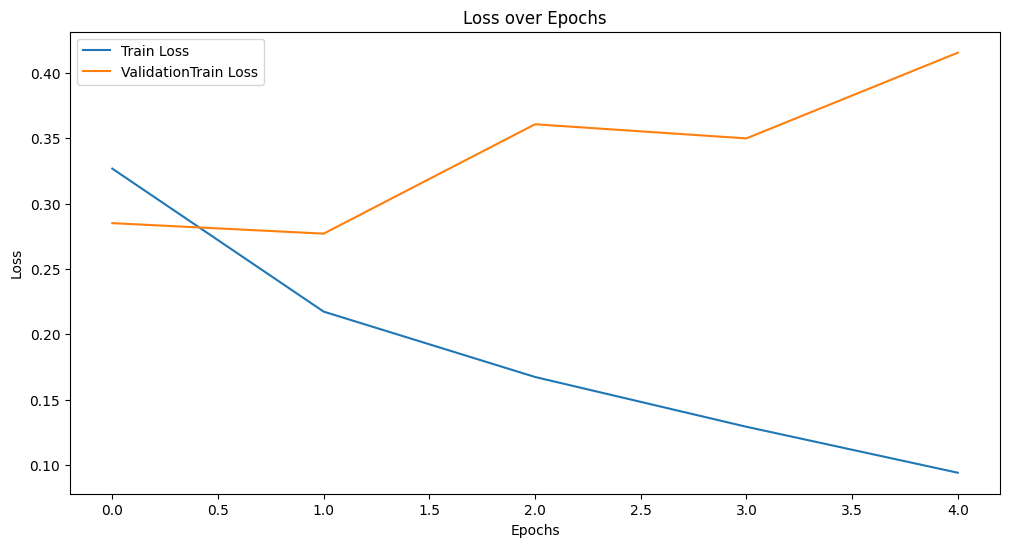

In [103]:
#Plot training and validation loss
plt.figure(figsize = (12, 6))
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'ValidationTrain Loss')
plt.title("Loss over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

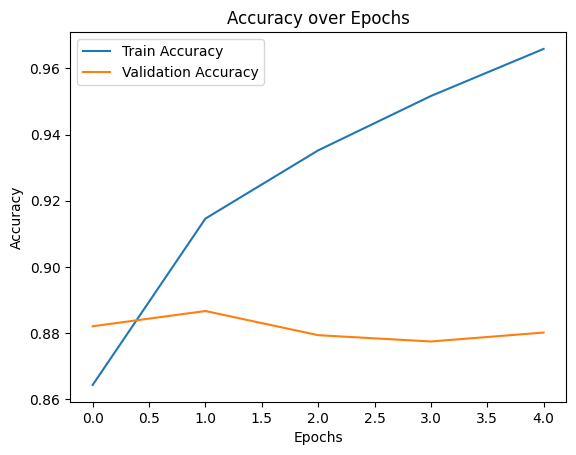

In [102]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Prediction

In [100]:
new_review = "The movie was absolutely fantastic! I loved it."
new_review_seq = tokenizer.texts_to_sequences([new_review])
new_review_padded = pad_sequences(new_review_seq, maxlen=200)

prediction = model.predict(new_review_padded)
print("Positive" if prediction > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Positive


In [104]:
new_review = "The movie was terrible, the plot was boring, and the acting was horrible"
new_review_seq = tokenizer.texts_to_sequences([new_review])
new_review_padded = pad_sequences(new_review_seq, maxlen=200)

prediction = model.predict(new_review_padded)
print("Positive" if prediction > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Negative
